# Pyber Analydsis

### 1. From the data , we can clearly see that URBAN areas are the leading in terms of rides and population.
### 2. From the data it is clear that there is a much larger number of drivers in urban areas than in suburban or rural, the average fare prices are still lower.
### 3. Rides prices are more competitive in Urban areas than other areas. In fact, we can colclude that lower the rides (drivers) in areas, higher is the ride cost.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rides = "ride_data.csv"
city = "city_data.csv"

In [62]:
df_city = pd.read_csv(city)
df_ride = pd.read_csv(rides)

In [63]:
# df_city = df_city.drop_duplicates('city')
# cities = df_city['city']
# cities

# Mergign city and rides data
df_Pyber = pd.merge(df_city,df_ride,on = 'city')
df_merged.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


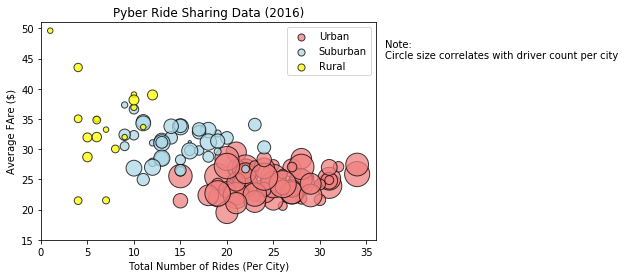

In [64]:
urban = df_Pyber.loc[df_Pyber['type']=='Urban']
rural = df_Pyber.loc[df_Pyber['type']=='Rural']
suburban = df_Pyber.loc[df_Pyber['type']=='Suburban']

# # Total Revenue Per City
urban_total = urban.groupby("city").sum()['fare']
suburban_total = suburban.groupby("city").sum()['fare']
rural_total = rural.groupby("city").sum()['fare']

# # Total Number of Rides Per City
urban_rides = urban.groupby("city").count()['ride_id']
suburban_rides = suburban.groupby("city").count()['ride_id']
rural_rides = rural.groupby("city").count()['ride_id']

# # Average Fare ($) Per City
urban_avg = round(urban_total/urban_rides,2)
suburban_avg = round(suburban_total/suburban_rides,2)
rural_avg = round(rural_total/rural_rides,2)

# # Total Number of Drivers Per City
urban_drivers = urban.drop_duplicates('city').set_index('city')['driver_count']
suburban_drivers = suburban.drop_duplicates('city').set_index('city')['driver_count']
rural_drivers = rural.drop_duplicates('city').set_index('city')['driver_count']

plt.scatter(urban_rides, urban_avg, marker='o', facecolors='lightcoral', edgecolors='black', s=urban_drivers*10, alpha=0.75, label='Urban')
plt.scatter(suburban_rides, suburban_avg, marker='o', facecolors='lightblue', edgecolors='black', s=suburban_drivers*10, alpha=0.75, label='Suburban')
plt.scatter(rural_rides, rural_avg, marker='o', facecolors='yellow', edgecolors='black', s=rural_drivers*10, alpha=0.75, label='Rural')

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim(0,36)
plt.ylabel("Average FAre ($)")
plt.ylim(15,51)
lgnd = plt.legend(scatterpoints=1)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

plt.annotate(s='Note:\nCircle size correlates with driver count per city', xy=(0,15), xytext=(37,45))

plt.show()

In [65]:
Pyber_total_fares = (df_Pyber.groupby("type")["fare"].sum() / df_Pyber["fare"].sum()*100).round(2)
df_Pyber_total_fares = pd.DataFrame(Pyber_total_fares).reset_index()
df_Pyber_total_fares

,type,fare
0,Rural,6.58
1,Suburban,31.45
2,Urban,61.97


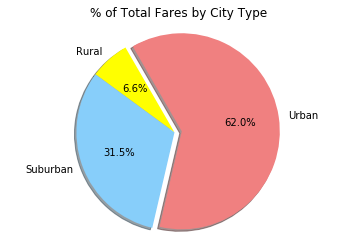

In [66]:
members = df_Pyber_total_fares['fare'].tolist()
types = df_Pyber_total_fares['type'].tolist()

colors = ["yellow", "lightskyblue","lightcoral"]
plt.title("% of Total Fares by City Type")
explode = (0,0,0.075)
plt.pie(members, labels=types, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

In [67]:
Pyber_total_rides = (df_Pyber.groupby("type")["ride_id"].count() / df_Pyber["ride_id"].count()*100).round(2)
df_Pyber_total_rides = pd.DataFrame(Pyber_total_rides).reset_index()
df_Pyber_total_rides

,type,ride_id
0,Rural,5.19
1,Suburban,27.30
2,Urban,67.51


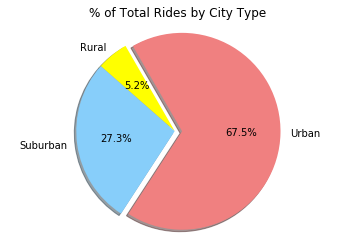

In [68]:
members = df_Pyber_total_rides['ride_id'].tolist()
types = df_Pyber_total_fares['type'].tolist()

colors = ["yellow", "lightskyblue","lightcoral"]
plt.title("% of Total Rides by City Type")
explode = (0,0,0.075)
plt.pie(members, labels=types, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

In [69]:
Pyber_total_drivers = (df_city.groupby("type")["driver_count"].sum() / df_city["driver_count"].sum()*100).round(2)
df_Pyber_total_drivers = pd.DataFrame(Pyber_total_drivers).reset_index()
df_Pyber_total_drivers


,type,driver_count
0,Rural,3.11
1,Suburban,19.05
2,Urban,77.84


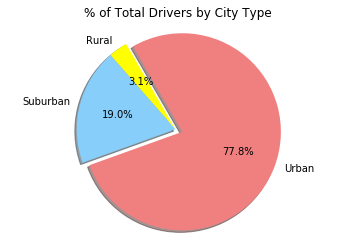

In [70]:
members = df_Pyber_total_drivers['driver_count'].tolist()
types = df_Pyber_total_fares['type'].tolist()

colors = ["yellow", "lightskyblue","lightcoral"]
plt.title("% of Total Drivers by City Type")
explode = (0,0,0.075)
plt.pie(members, labels=types, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()